## Imports

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

from collections import Counter
from pprint import pprint

import os
from math import log

## Load Data

### Load Interactions Data

In [2]:
interactions_df = pd.read_csv('../data/users_interactions.csv')
interactions_df.fillna('UNKOWN', inplace=True)
interactions_df.shape

(72312, 8)

In [3]:
interactions_df.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,UNKOWN,UNKOWN,UNKOWN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,UNKOWN,UNKOWN,UNKOWN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,UNKOWN,UNKOWN,UNKOWN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,UNKOWN,UNKOWN,UNKOWN


#### Drop Columns/Features not used

In [52]:
interactions_df.drop(['userAgent', 'userRegion', 'userCountry'], axis=1, inplace=True)
interactions_df.head()

,timestamp,eventType,contentId,personId,sessionId
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714


In [53]:
interactions_df.shape

(72312, 5)

#### Observe TimeStamp is not unique key

In [4]:
# i_timestamp = interactions_df.groupby('timestamp').size()
# i_timestamp[i_timestamp > 1].sort_values(ascending=False)

In [5]:
interactions_df[interactions_df['timestamp'] == 1464315825]

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
35441,1464315825,BOOKMARK,1031060816592502094,1116121227607581999,5983514973000434140,UNKOWN,UNKOWN,UNKOWN
35443,1464315825,BOOKMARK,-4095842175692097942,1116121227607581999,5983514973000434140,UNKOWN,UNKOWN,UNKOWN
35458,1464315825,BOOKMARK,-7331393944609614247,1116121227607581999,5983514973000434140,UNKOWN,UNKOWN,UNKOWN
35464,1464315825,VIEW,8396284143617057811,1116121227607581999,5983514973000434140,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,SP,BR
35469,1464315825,BOOKMARK,817467807875770568,1116121227607581999,5983514973000434140,UNKOWN,UNKOWN,UNKOWN
35473,1464315825,BOOKMARK,-3954182109690207118,1116121227607581999,5983514973000434140,UNKOWN,UNKOWN,UNKOWN
35480,1464315825,BOOKMARK,-6792965795755857419,1116121227607581999,5983514973000434140,UNKOWN,UNKOWN,UNKOWN


#### Infer Unique Key ('sessionId', 'personId', 'contentId')

In [6]:
# ii_df = interactions_df.set_index(['sessionId', 'personId', 'contentId'])
# ii_df.head()

In [7]:
# ii_df.shape

### Load Articles Data

In [8]:
articles_df = pd.read_csv('../data/shared_articles.csv')
articles_df.fillna('UNKOWN', inplace=True)
articles_df.shape

(3122, 13)

In [9]:
articles_df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,UNKOWN,UNKOWN,UNKOWN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


#### Drop Columns/Features not used

In [54]:
articles_df = articles_df[['contentId', 'eventType', 'lang']]
articles_df.head()

,contentId,eventType,lang
0,-6451309518266745024,CONTENT REMOVED,en
1,-4110354420726924665,CONTENT SHARED,en
2,-7292285110016212249,CONTENT SHARED,en
3,-6151852268067518688,CONTENT SHARED,en
4,2448026894306402386,CONTENT SHARED,en


In [55]:
articles_df.shape

(3122, 3)

### Get Metadata of Articles which are shared

In [56]:
shared_articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
shared_articles_df.shape

(3047, 3)

In [75]:
shared_articles_df.head()

,contentId,eventType,lang
1,-4110354420726924665,CONTENT SHARED,en
2,-7292285110016212249,CONTENT SHARED,en
3,-6151852268067518688,CONTENT SHARED,en
4,2448026894306402386,CONTENT SHARED,en
5,-2826566343807132236,CONTENT SHARED,en


In [76]:
shared_articles_df.drop(['eventType'], axis=1, inplace=True)
shared_articles_df.head()

/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,contentId,lang
1,-4110354420726924665,en
2,-7292285110016212249,en
3,-6151852268067518688,en
4,2448026894306402386,en
5,-2826566343807132236,en


In [77]:
shared_articles_df.shape

(3047, 2)

In [78]:
interactions_meta_df = interactions_df.merge(shared_articles_df, 
                                              how='left',
                                              on='contentId',
                                              suffixes=('_interaction', '_article')
                                             )
interactions_meta_df.shape

(72312, 6)

In [79]:
interactions_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId,lang
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,en
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,en
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,pt
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,pt
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,en


In [80]:
interactions_meta_df['lang'].value_counts()

en    47041
pt    25133
la       54
ja       34
es        7
Name: lang, dtype: int64

In [17]:
# interactions_meta_df[interactions_meta_df['lang'] == 'pt']['url'].to_dict()

### Filter Interactions in English
#### To get intuition about articles rec and aid in Topic Modelling

In [81]:
interactions_eng_meta_df = interactions_meta_df[interactions_meta_df['lang'] == 'en']

In [82]:
interactions_eng_meta_df.shape

(47041, 6)

In [83]:
interactions_eng_meta_df.drop(['lang'], axis=1, inplace=True)
interactions_eng_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524


In [84]:
interactions_eng_meta_df.shape

(47041, 5)

### Convert TimeStamp to DateTime

In [85]:
interactions_eng_meta_df.loc[:, 'datetime'] = interactions_eng_meta_df['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
interactions_eng_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId,datetime
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,2016-06-08 19:10:32
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,2016-06-08 19:02:40
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,2016-06-08 18:58:10
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,2016-06-08 19:44:26
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,2016-06-08 19:22:51


In [86]:
interactions_eng_meta_df['datetime'].describe()

count                   47041
unique                  44782
top       2016-06-13 14:51:58
freq                        4
first     2016-03-28 20:03:20
last      2017-02-28 19:21:51
Name: datetime, dtype: object

In [87]:
interactions_eng_meta_df.loc[:, 'year'] = interactions_eng_meta_df['datetime'].dt.year
interactions_eng_meta_df.loc[:, 'quarter'] = interactions_eng_meta_df['datetime'].dt.to_period("Q")
interactions_eng_meta_df.loc[:, 'month'] = interactions_eng_meta_df['datetime'].dt.to_period("M")

In [88]:
interactions_eng_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId,datetime,year,quarter,month
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,2016-06-08 19:10:32,2016,2016Q2,2016-06
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,2016-06-08 19:02:40,2016,2016Q2,2016-06
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,2016-06-08 18:58:10,2016,2016Q2,2016-06
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,2016-06-08 19:44:26,2016,2016Q2,2016-06
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,2016-06-08 19:22:51,2016,2016Q2,2016-06


## Data Distribution across Time Periods

In [89]:
interactions_eng_meta_df['year'].value_counts()

2016    43412
2017     3629
Name: year, dtype: int64

In [90]:
interactions_eng_meta_df['quarter'].value_counts().sort_index()

2016Q1      743
2016Q2    22314
2016Q3    13696
2016Q4     6659
2017Q1     3629
Freq: Q-DEC, Name: quarter, dtype: int64

In [91]:
interactions_eng_meta_df['month'].value_counts().sort_index()

2016-03      743
2016-04     4920
2016-05     6062
2016-06    11332
2016-07     4317
2016-08     5450
2016-09     3929
2016-10     3460
2016-11     1719
2016-12     1480
2017-01     1547
2017-02     2082
Freq: M, Name: month, dtype: int64

## Type of Interactions

In [92]:
interactions_eng_meta_df['eventType'].value_counts()

VIEW               39823
LIKE                3431
BOOKMARK            1847
COMMENT CREATED     1038
FOLLOW               902
Name: eventType, dtype: int64

In [93]:
interactions_eng_meta_df['eventType'].value_counts()/ len(interactions_eng_meta_df) * 100

VIEW               84.655938
LIKE                7.293637
BOOKMARK            3.926362
COMMENT CREATED     2.206586
FOLLOW              1.917476
Name: eventType, dtype: float64

As there are different interactions types, we associate them with a weight or strength, assuming that, for example, a comment in an article indicates a higher interest of the user on the item than a like, or than a simple view.

In [95]:
event_type_strength_dict = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

interactions_eng_meta_df.loc[:, 'eventStrength'] = interactions_eng_meta_df['eventType'].\
                                                    apply(lambda x: event_type_strength_dict[x])

/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [96]:
interactions_eng_meta_df['eventStrength'].value_counts()

1.0    39823
2.0     3431
2.5     1847
4.0     1038
3.0      902
Name: eventStrength, dtype: int64

### Sort By Interaction TimeStamp

In [97]:
sorted_interactions_eng_meta_df = interactions_eng_meta_df.sort_values('timestamp', ascending=True)

In [98]:
for _id, df in sorted_interactions_eng_meta_df.groupby(['personId', 'contentId']):
    if len(df) > 3:
        print(_id)
        print(df)
        break

(-9156344805277471150, -3206777048078326150)
        timestamp        eventType            contentId             personId  \
12904  1463684167             VIEW -3206777048078326150 -9156344805277471150   
12908  1463684612  COMMENT CREATED -3206777048078326150 -9156344805277471150   
3810   1463689402             VIEW -3206777048078326150 -9156344805277471150   
11459  1463695228             VIEW -3206777048078326150 -9156344805277471150   
23914  1463725997             VIEW -3206777048078326150 -9156344805277471150   
23912  1463726178  COMMENT CREATED -3206777048078326150 -9156344805277471150   
10653  1463772991             VIEW -3206777048078326150 -9156344805277471150   

                 sessionId            datetime  year quarter    month  \
12904   150994502476287038 2016-05-19 18:56:07  2016  2016Q2  2016-05   
12908   150994502476287038 2016-05-19 19:03:32  2016  2016Q2  2016-05   
3810    150994502476287038 2016-05-19 20:23:22  2016  2016Q2  2016-05   
11459   15099450247628

## Total User, Item Counts

In [99]:
sorted_interactions_eng_meta_df.shape

(47041, 10)

In [100]:
#No of Users
no_of_users = len(sorted_interactions_eng_meta_df['personId'].unique())
no_of_users

1644

In [101]:
#No of Items
no_of_items = len(sorted_interactions_eng_meta_df['contentId'].unique())
no_of_items

2149

## Generate DataSets across Time Periods

In Deskdrop, users are allowed to view an article many times, and interact with them in different ways (eg. like or comment). Thus, to model the user interest on a given article, we aggregate all the interactions the user has performed in an item by a weighted sum of interaction type strength and apply a log transformation to smooth the distribution.

In [121]:
def smooth_user_preference(x):
    return log(1+x, 2).round(4)

def estimate_preference(df, user_col, item_col, event_strength):    
    #print(df.shape)
    
    aggregated_df = df.groupby([user_col, item_col])[event_strength].sum() \
                      .apply(smooth_user_preference).reset_index()
    aggregated_df.rename(columns={event_strength: 'preference'}, inplace=True)    
    #print(aggregated_df.shape)
    
    preferences_df = df.merge(aggregated_df, on=[user_col, item_col], how='left')
    #print(preferences_df.shape)
    
    return preferences_df

In [119]:
def generate_datasets(interactions_df, period_col, user_col, item_col, datasets_dir):
    if not os.path.exists(datasets_dir):
        os.makedirs(datasets_dir)
    periods = interactions_df[period_col].value_counts().sort_index().index

    for period in periods:        
        count = len(interactions_df[interactions_df[period_col] == period])
        print("interactions_count in {} : {}".format(period, count))        
    print()
    
    no_of_datasets = 0
    for i, period in enumerate(periods):
        elapsed_periods = list(periods[:i])
        elapsed_periods.append(period)
        
        # print(elapsed_periods)
        print("elapsed_" + period_col + "s   : ", [str(period) for period in elapsed_periods])
        interactions_during_elapsed_periods_df = interactions_df[interactions_df[period_col].isin(elapsed_periods)]
        print("interactions_count : ", len(interactions_during_elapsed_periods_df))
        
        users_count = len(interactions_during_elapsed_periods_df[user_col].unique())
        items_count = len(interactions_during_elapsed_periods_df[item_col].unique())
        print("users_count        :  {}\nitems_count        :  {}".format(users_count, items_count))        
        print()
        
        no_of_elapsed_periods = len(elapsed_periods)
        if no_of_elapsed_periods > 1:
            train_periods = elapsed_periods[:no_of_elapsed_periods-1] #except last period
            test_period = elapsed_periods[-1] #last period
            
            no_of_datasets += 1
            dataset_name = 'dataset_' + str(no_of_datasets)
            print("Generating Dataset : ", dataset_name)
            dataset_dir = os.path.join(datasets_dir, dataset_name)
            if not os.path.exists(dataset_dir):
                os.makedirs(dataset_dir)

            #################################################################################################
            # print("Train {} : {}".format(period_col, train_periods))
            print("Train {} : {}".format(period_col, [str(period) for period in train_periods]))
            interactions_during_train_periods_df = interactions_df[interactions_df[period_col].isin(train_periods)]
            train_df = estimate_preference(interactions_during_train_periods_df,
                                           user_col, item_col, 'eventStrength') 
            train_periods_str = '_'.join([str(period) for period in train_periods])
            train_file_name = 'train_' + train_periods_str + '.csv'
            train_file_path = os.path.join(dataset_dir, train_file_name)
            #interactions_during_train_periods_df.to_csv(train_file_path, index=False)
            train_df.to_csv(train_file_path, index=False)
            
            print("\t interactions_count : ", len(train_df))
            users_count = len(train_df[user_col].unique())
            items_count = len(train_df[item_col].unique())
            print("\t users_count        :  {}\n\t items_count        :  {}".format(users_count, items_count))            
            #################################################################################################            
            print("Test  {} : {}".format(period_col, test_period))
            interactions_during_test_periods_df = interactions_df[interactions_df[period_col].isin([test_period])]
            test_df = estimate_preference(interactions_during_test_periods_df,
                                          user_col, item_col, 'eventStrength')
            
            test_period_str = str(test_period)
            test_file_name = 'test_' + test_period_str + '.csv'
            test_file_path = os.path.join(dataset_dir, test_file_name)
            #interactions_during_test_periods_df.to_csv(test_file_path, index=False)
            test_df.to_csv(test_file_path, index=False)
            
            print("\t interactions_count : ", len(test_df))
            users_count = len(test_df[user_col].unique())
            items_count = len(test_df[item_col].unique())
            print("\t users_count        :  {}\n\t items_count        :  {}".format(users_count, items_count))            
            #################################################################################################
            print("Train and test {}".format(period_col))
            train_users_set = set(train_df[user_col].unique())
            test_users_set = set(test_df[user_col].unique())
            common_users_set = train_users_set.intersection(test_users_set)
            only_in_train_users_set = train_users_set - test_users_set
            only_in_test_users_set = test_users_set - train_users_set
                
            train_items_set = set(train_df[item_col].unique())
            test_items_set = set(test_df[item_col].unique())
            common_items_set = train_items_set.intersection(test_items_set)
            only_in_train_items_set = train_items_set - test_items_set
            only_in_test_items_set = test_items_set - train_items_set

            print("\t Common")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(common_users_set), 
                                                                                        len(common_items_set)))
            print("\t Only_in_train")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(only_in_train_users_set), 
                                                                                        len(only_in_train_items_set)))
            print("\t Only_in_test")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(only_in_test_users_set), 
                                                                                        len(only_in_test_items_set)))   
                       
            
            fig, (ax1, ax2) = plt.subplots(1, 2)
            ax1.set_title('Users')
            venn2(subsets = (len(only_in_train_users_set), len(only_in_test_users_set), len(common_users_set)), 
                  set_labels = ('Train', 'Test'), ax=ax1)
            
            ax2.set_title('Items')
            venn2(subsets = (len(only_in_train_items_set), len(only_in_test_items_set), len(common_items_set)), 
                  set_labels = ('Train', 'Test'), ax=ax2)
            plt.show()                        
            
            print("Recommender Setup : {}".format(period_col))
                                     
            existing_users_in_test_set = common_users_set                        
            new_items_in_test_set = only_in_test_items_set
            
            existing_users_in_test_items_used_set = set(test_df[test_df[user_col].isin(existing_users_in_test_set)][item_col].unique())
            existing_items_used_set = existing_users_in_test_items_used_set.intersection(common_items_set)
            new_items_used_set = existing_users_in_test_items_used_set.intersection(new_items_in_test_set)
                                                                    
            print("\t No of train_users in test   : ", len(existing_users_in_test_set))
            print("\t No of items_used            : ", len(existing_users_in_test_items_used_set))
            print("\t\t No of existing_items_used   : ", len(existing_items_used_set))            
            print("\t\t No of new_items_used        : ", len(new_items_used_set))
            is_valid = True if (existing_users_in_test_items_used_set == existing_items_used_set.union(new_items_used_set)) else False            
            if not is_valid:
                print("\t Items Add Up ? : ", is_valid)
                input()                                      
            print()                        
            
#             new_users_in_test_set = only_in_test_users_set
#             new_items_in_test_set = only_in_test_items_set
#             new_users_used_items_set = set(interactions_during_test_periods_df[\
#                 interactions_during_test_periods_df[user_col].isin(new_users_in_test_set)][item_col].unique())
#             new_users_used_existing_items_set = new_users_used_items_set.intersection(existing_items_used_set)
#             new_users_used_new_items_set = new_users_used_items_set.intersection(new_items_in_test_set)
#             print("\t No of new users in test   : ", len(new_users_in_test_set))
#             print("\t No of items_used          : ", len(new_users_used_items_set))
#             print("\t No of existing_items_used : ", len(new_users_used_existing_items_set))
#             print("\t No of new_items_used      : ", len(new_users_used_new_items_set))
        print('*'*80)

interactions_count in 2016Q1 : 743
interactions_count in 2016Q2 : 22314
interactions_count in 2016Q3 : 13696
interactions_count in 2016Q4 : 6659
interactions_count in 2017Q1 : 3629

elapsed_quarters   :  ['2016Q1']
interactions_count :  743
users_count        :  174
items_count        :  99

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2']
interactions_count :  23057
users_count        :  1111
items_count        :  1143

Generating Dataset :  dataset_1
Train quarter : ['2016Q1']
(743, 10)
(496, 3)
(743, 11)

	 interactions_count :  743
	 users_count        :  174
	 items_count        :  99
Test  quarter : 2016Q2
(22314, 10)
(11077, 3)
(22314, 11)

	 interactions_count :  22314
	 users_count        :  1098
	 items_count        :  1112
Train and test quarter
	 Common
		 users_count        :  161
		 items_count        :  68
	 Only_in_train
		 users_count        :  13
		 items_count        :  31
	 Only_in_test
		 us

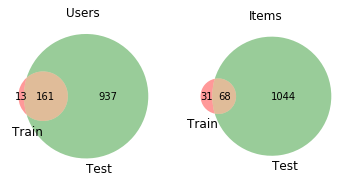

Recommender Setup : quarter
	 No of train_users in test   :  161
	 No of items_used            :  1052
		 No of existing_items_used   :  61
		 No of new_items_used        :  991

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3']
interactions_count :  36753
users_count        :  1405
items_count        :  1721

Generating Dataset :  dataset_2
Train quarter : ['2016Q1', '2016Q2']
(23057, 10)
(11541, 3)
(23057, 11)

	 interactions_count :  23057
	 users_count        :  1111
	 items_count        :  1143
Test  quarter : 2016Q3
(13696, 10)
(8311, 3)
(13696, 11)

	 interactions_count :  13696
	 users_count        :  1052
	 items_count        :  892
Train and test quarter
	 Common
		 users_count        :  758
		 items_count        :  314
	 Only_in_train
		 users_count        :  353
		 items_count        :  829
	 Only_in_test
		 users_count        :  294
		 items_count        :  578


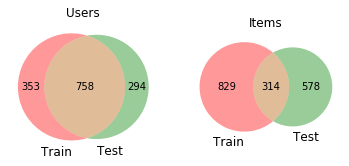

Recommender Setup : quarter
	 No of train_users in test   :  758
	 No of items_used            :  856
		 No of existing_items_used   :  281
		 No of new_items_used        :  575

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3', '2016Q4']
interactions_count :  43412
users_count        :  1549
items_count        :  2017

Generating Dataset :  dataset_3
Train quarter : ['2016Q1', '2016Q2', '2016Q3']
(36753, 10)
(19713, 3)
(36753, 11)

	 interactions_count :  36753
	 users_count        :  1405
	 items_count        :  1721
Test  quarter : 2016Q4
(6659, 10)
(4426, 3)
(6659, 11)

	 interactions_count :  6659
	 users_count        :  866
	 items_count        :  636
Train and test quarter
	 Common
		 users_count        :  722
		 items_count        :  340
	 Only_in_train
		 users_count        :  683
		 items_count        :  1381
	 Only_in_test
		 users_count        :  144
		 items_count        :  296


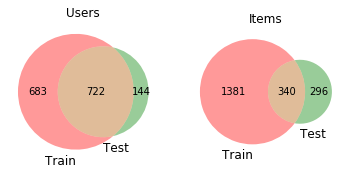

Recommender Setup : quarter
	 No of train_users in test   :  722
	 No of items_used            :  609
		 No of existing_items_used   :  316
		 No of new_items_used        :  293

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1']
interactions_count :  47041
users_count        :  1644
items_count        :  2149

Generating Dataset :  dataset_4
Train quarter : ['2016Q1', '2016Q2', '2016Q3', '2016Q4']
(43412, 10)
(23997, 3)
(43412, 11)

	 interactions_count :  43412
	 users_count        :  1549
	 items_count        :  2017
Test  quarter : 2017Q1
(3629, 10)
(2272, 3)
(3629, 11)

	 interactions_count :  3629
	 users_count        :  764
	 items_count        :  319
Train and test quarter
	 Common
		 users_count        :  669
		 items_count        :  187
	 Only_in_train
		 users_count        :  880
		 items_count        :  1830
	 Only_in_test
		 users_count        :  95
		 items_count        

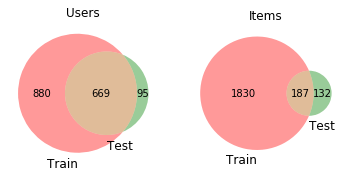

Recommender Setup : quarter
	 No of train_users in test   :  669
	 No of items_used            :  306
		 No of existing_items_used   :  174
		 No of new_items_used        :  132

********************************************************************************


In [120]:
generate_datasets(interactions_df = sorted_interactions_eng_meta_df,
                  period_col='quarter', user_col='personId', item_col='contentId',
                  datasets_dir='../train_test_datasets')